In [5]:
import pandas as pd

# Load the datasets
users = pd.read_csv('/content/Users.csv')
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')

# Display the first few rows of each dataset
users

<ipython-input-5-e1fef635167c>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [6]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#Data Preprocessing

In [8]:
# Check for missing values in Users dataset
print(users.isnull().sum())

# Fill missing values or drop if necessary
users['Age'].fillna(users['Age'].mean(), inplace=True)

# Check for missing values in Books dataset
print(books.isnull().sum())


User-ID          0
Location         0
Age         110762
dtype: int64
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [9]:
# prompt: Fill or drop missing values in Books

# Fill missing values in 'Publisher' with 'Unknown'
books['Publisher'].fillna('Unknown', inplace=True)

# Drop rows with missing values in other columns if necessary
books.dropna(inplace=True)

# Verify if there are any remaining missing values
print(books.isnull().sum())


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [10]:
# Check for missing values in Ratings dataset
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [11]:
# Ratings preprocessing (implicit ratings are marked as 0, might need filtering)
ratings = ratings[ratings['Book-Rating'] != 0]  # Filtering implicit ratings if required


In [12]:
# Merge the datasets
data = pd.merge(ratings, users, on='User-ID')
data = pd.merge(data, books, on='ISBN')
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,"seattle, washington, usa",34.751434,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,"rijeka, n/a, croatia",16.000000,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,"rijeka, n/a, croatia",16.000000,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,"torrance, california, usa",34.751434,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,"n/a, n/a, n/a",34.751434,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...


# Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


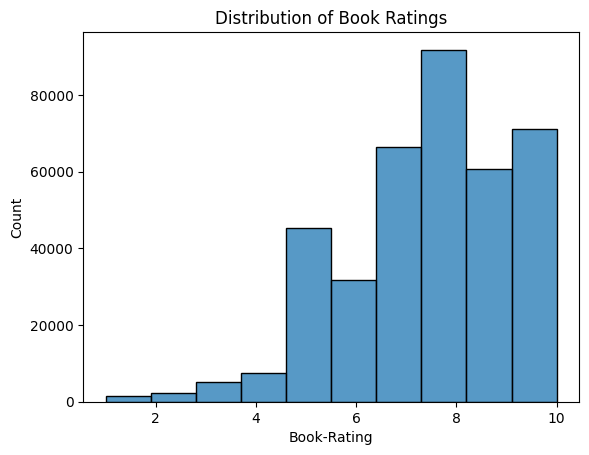

In [14]:
# Distribution of Ratings
sns.histplot(data['Book-Rating'], bins=10, kde=False)
plt.title('Distribution of Book Ratings')
plt.show()

In [15]:
# Most rated books
most_rated_books = data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)
print(most_rated_books)

Book-Title
The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     366
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: Book-Rating, dtype: int64


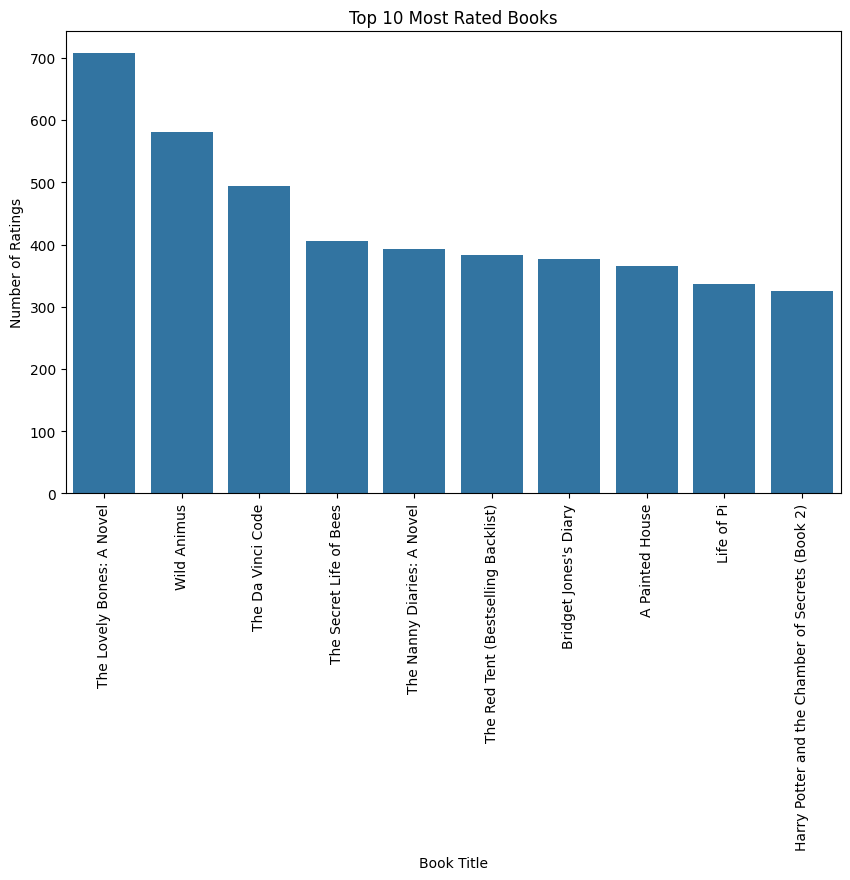

In [16]:
# prompt: draw the graph for the above

plt.figure(figsize=(10, 6))
sns.barplot(x=most_rated_books.index, y=most_rated_books.values)
plt.title('Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


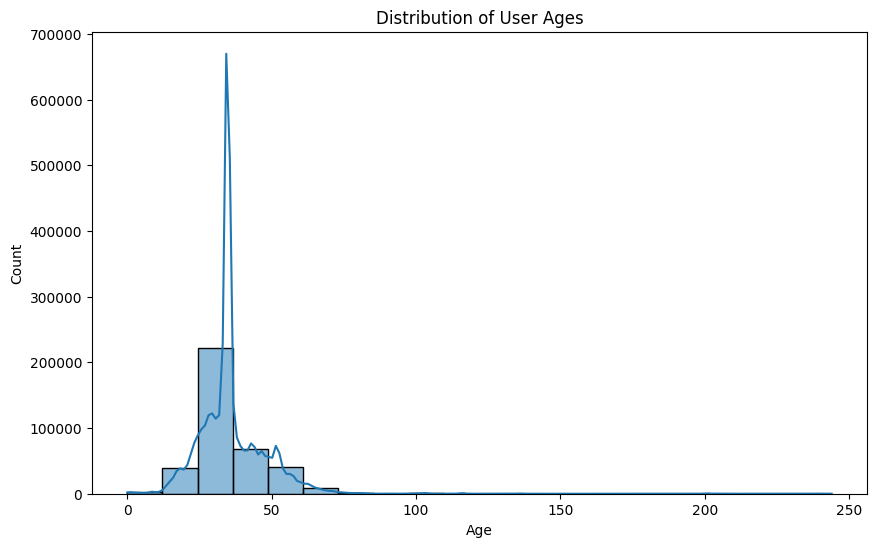

In [17]:
# prompt: give me more important graphs in the merged data set

# Distribution of User Ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

User-ID
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
Name: Book-Rating, dtype: int64


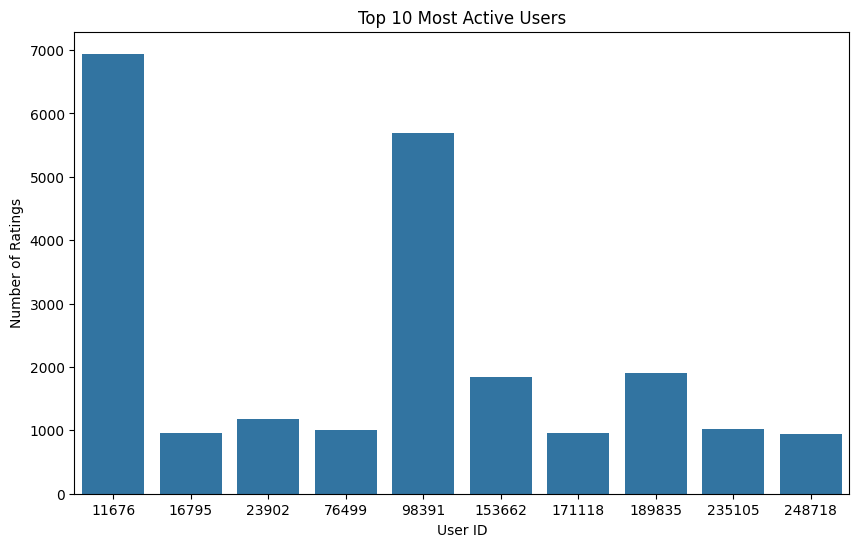

In [18]:
# Top 10 Most Active Users
most_active_users = data.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False).head(10)
print(most_active_users)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_users.index, y=most_active_users.values)
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()


Book-Author
 D. Chiel            10.0
Larry K. Brendtro    10.0
Larry Towell         10.0
Larry Sloman         10.0
Larry Sabato         10.0
Larry Nyhoff         10.0
Carole Ann Lee       10.0
Larry Lachman        10.0
Larry Keenan         10.0
Carole Chester       10.0
Name: Book-Rating, dtype: float64


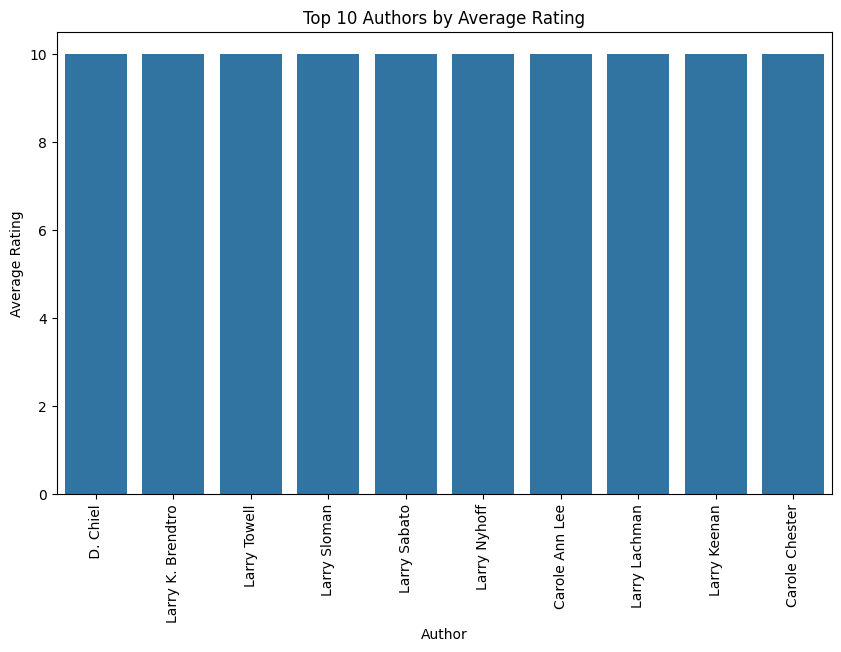

In [19]:
# Average Rating by Book Author
avg_rating_by_author = data.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_author)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_author.index, y=avg_rating_by_author.values)
plt.title('Top 10 Authors by Average Rating')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


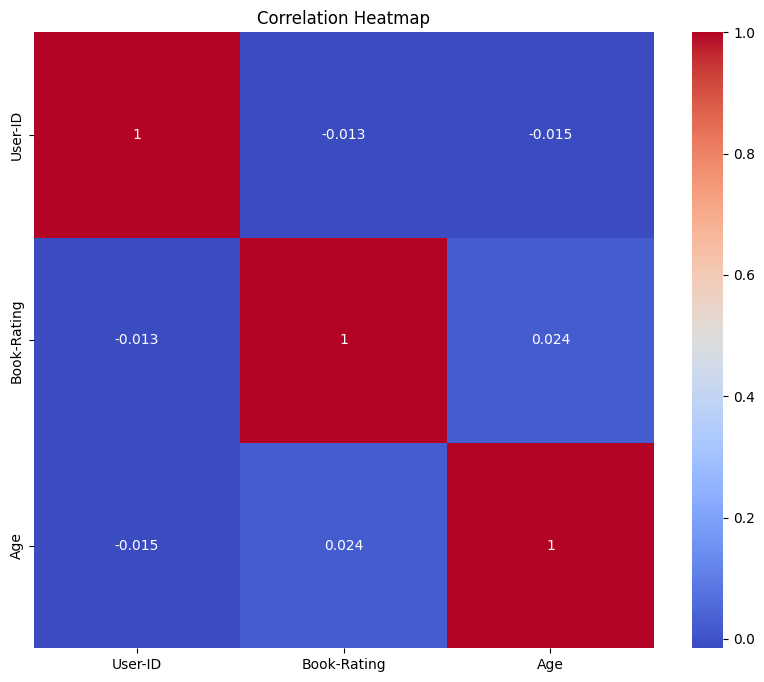

In [21]:
# Drop non-numerical columns before calculating correlations
numerical_data = data.select_dtypes(include=['float', 'int'])  # Select only numerical columns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

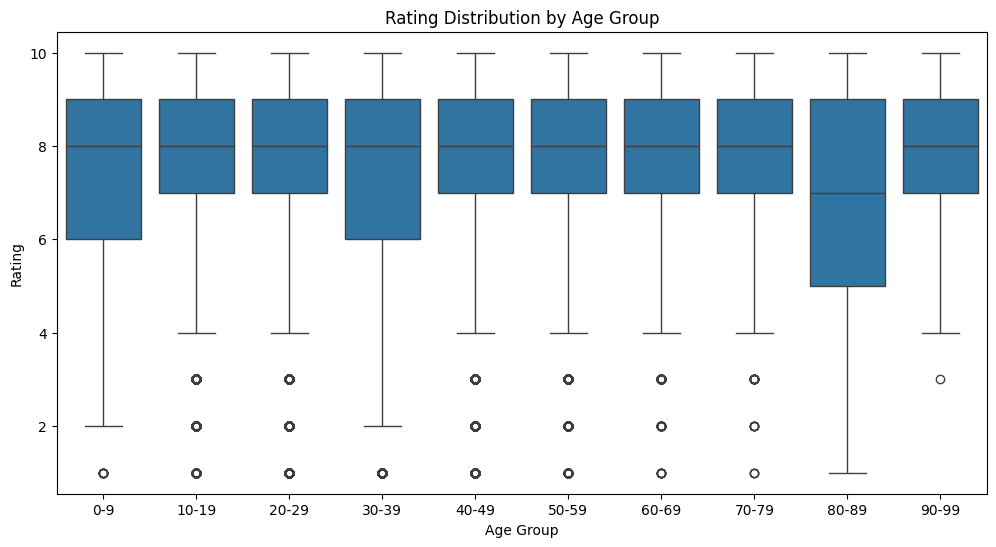

In [22]:
# Box plot of Rating by Age Group (e.g., 10-year bins)
data['Age Group'] = pd.cut(data['Age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Book-Rating', data=data)
plt.title('Rating Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.show()

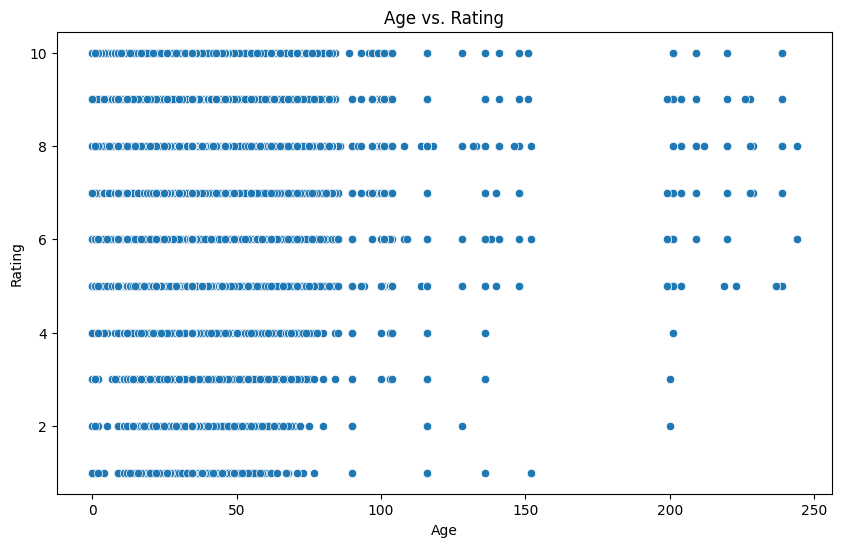

In [23]:
# Scatter plot of Age vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Book-Rating', data=data)
plt.title('Age vs. Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

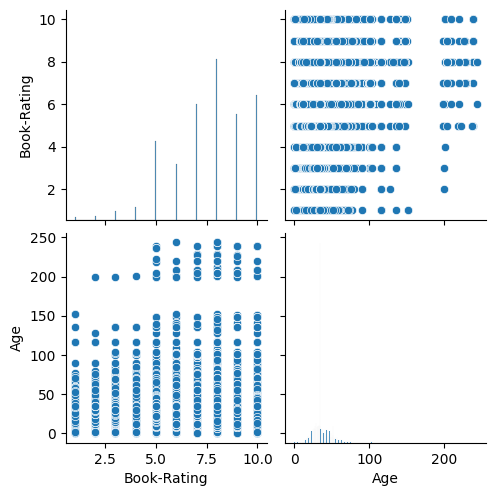

In [24]:
# Pairplot for selected numerical variables
sns.pairplot(data[['Book-Rating', 'Age']])
plt.show()

#Model Building (Collaborative Filtering)

In [25]:
!pip install scikit-surprise

In [26]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [27]:
# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 10))
data_surprise = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [28]:
# Use SVD (Singular Value Decomposition) algorithm
algo = SVD()

In [29]:
# Perform cross-validation
cross_validate(algo, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6415  1.6312  1.6422  1.6348  1.6333  1.6366  0.0044  
MAE (testset)     1.2656  1.2586  1.2674  1.2616  1.2634  1.2633  0.0031  
Fit time          9.79    11.30   10.39   10.05   11.71   10.65   0.74    
Test time         1.36    1.41    0.92    1.35    2.18    1.44    0.41    


{'test_rmse': array([1.64152802, 1.63118334, 1.64220445, 1.63483194, 1.63333933]),
 'test_mae': array([1.26558423, 1.25858575, 1.26736223, 1.2616183 , 1.26339487]),
 'fit_time': (9.789189100265503,
  11.302107572555542,
  10.390220642089844,
  10.045110702514648,
  11.709408044815063),
 'test_time': (1.363023281097412,
  1.4092378616333008,
  0.917382001876831,
  1.3515784740447998,
  2.1786012649536133)}

In [30]:
# Train the algorithm on the whole dataset
trainset = data_surprise.build_full_trainset()
algo.fit(trainset)

In [31]:
# Example user and book
user_id = 276729  # Example user ID
isbn = '034545104X'  # Example ISBN for the book

# Predict the rating
prediction = algo.predict(user_id, isbn)
print(prediction)


user: 276729     item: 034545104X r_ui = None   est = 6.08   {'was_impossible': False}


In [32]:
# List of ISBNs to predict ratings for
isbn_list = ['034545104X', '0155061224', '044023722X']  # Replace with actual ISBNs

# Predict ratings for all books in the list
for isbn in isbn_list:
    prediction = algo.predict(user_id, isbn)
    print(f'Predicted rating for ISBN {isbn}: {prediction.est}')


Predicted rating for ISBN 034545104X: 6.082655396904523
Predicted rating for ISBN 0155061224: 6.777233523366099
Predicted rating for ISBN 044023722X: 7.0075788503087715


In [33]:
# Predict ratings for all books the user hasn't rated yet
all_books = data['ISBN'].unique()
rated_books = data[data['User-ID'] == user_id]['ISBN'].unique()
books_to_predict = [isbn for isbn in all_books if isbn not in rated_books]

predictions = [algo.predict(user_id, isbn) for isbn in books_to_predict]
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]  # Top 10 recommendations

# Print top-N recommendations
for prediction in top_n:
    print(f'ISBN: {prediction.iid}, Predicted Rating: {prediction.est}')


ISBN: 0439425220, Predicted Rating: 8.938391954222046
ISBN: 043936213X, Predicted Rating: 8.77889071556497
ISBN: 0743454529, Predicted Rating: 8.737092918904015
ISBN: 0140143505, Predicted Rating: 8.703848998065006
ISBN: 0345342968, Predicted Rating: 8.683986687331245
ISBN: 067168390X, Predicted Rating: 8.633570526671507
ISBN: 0345339703, Predicted Rating: 8.577960273204395
ISBN: 0618129022, Predicted Rating: 8.569001576119293
ISBN: 0553274325, Predicted Rating: 8.551630494387444
ISBN: 0439136369, Predicted Rating: 8.539090946392403


In [34]:
# Predict ratings for all books the user hasn't rated yet
all_books = data['ISBN'].unique()
rated_books = data[data['User-ID'] == user_id]['ISBN'].unique()
books_to_predict = [isbn for isbn in all_books if isbn not in rated_books]

predictions = [algo.predict(user_id, isbn) for isbn in books_to_predict]
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]  # Top 10 recommendations

# Create a mapping of ISBN to book titles
isbn_to_title = dict(zip(books['ISBN'], books['Book-Title']))

# Print top-N recommendations with book names
for prediction in top_n:
    isbn = prediction.iid
    title = isbn_to_title.get(isbn, 'Unknown Title')
    print(f'Title: {title}, ISBN: {isbn}, Predicted Rating: {prediction.est}')


Title: Harry Potter and the Chamber of Secrets Postcard Book, ISBN: 0439425220, Predicted Rating: 8.938391954222046
Title: Harry Potter and the Sorcerer's Stone (Book 1), ISBN: 043936213X, Predicted Rating: 8.77889071556497
Title: My Sister's Keeper : A Novel (Picoult, Jodi), ISBN: 0743454529, Predicted Rating: 8.737092918904015
Title: 84 Charing Cross Road, ISBN: 0140143505, Predicted Rating: 8.703848998065006
Title: Fahrenheit 451, ISBN: 0345342968, Predicted Rating: 8.683986687331245
Title: Lonesome Dove, ISBN: 067168390X, Predicted Rating: 8.633570526671507
Title: The Fellowship of the Ring (The Lord of the Rings, Part 1), ISBN: 0345339703, Predicted Rating: 8.577960273204395
Title: The Lord of the Rings (Movie Art Cover), ISBN: 0618129022, Predicted Rating: 8.569001576119293
Title: Johnny Got His Gun, ISBN: 0553274325, Predicted Rating: 8.551630494387444
Title: Harry Potter and the Prisoner of Azkaban (Book 3), ISBN: 0439136369, Predicted Rating: 8.539090946392403
